* 점추정(Point Estimation): 데이터셋의 분포에 대하여 가장 근사한 단일 값을 추정하는 것입니다. 모집단의 특성을 단일한 값으로 추정하는 것과 같은 말입니다.
* 구간추정(Interval Estimation): 모수가 있을만한 구간(예상 범위)을 정하고 모수가 실제로 정해놓은 구간에 있을 확률을 구하는 것입니다.
* 신뢰수준(Confidence Level): 주로 95%와 99%를 사용하며 신뢰구간에서 모수가 포함되는 것을 어느정도 신뢰할 수 있는지를 나타낸 것입니다.
* 신뢰구간(Confidence Interval): 모수가 어느범위 내에 있는지 확률적으로 보여주는 것이며 전체가 아닌 샘플링된(일부) 데이터에서 모수의 범위를 찾기 위해서 사용합니다. 샘플링된 데이터가 전체 데이터를 얼마나 잘 대표할 수 있는지를 측정할 수 있습니다.
* 이분산성(Heteroskedasticity): 독립변수의 값 마다 오차항의 분산이 일정하지 않은 경우를 의미합니다.
* 조건부 이분산성(Conditional Heteroskedasticity): 독립변수와 오차항이 상관관계가 있는 경우를 의미합니다.
* 무조건부 이분산성(Unconditional Heteroskedasticity): 독립변수와 오차항이 상관관계가 없는 경우를 의미합니다.
* 표준화된 잔차(Standardized Residuals): 잔차는 관측값 - 예측값을 말하며 표준화된 잔차는 여러 잔차들을 표준화하여 나온 값입니다.
    - 잔차들중에 이상치(Outlier)가 없는지 판별할 수 있습니다.
* 조건부 분산(Conditional Volatility): 예측의 불확실성을 뜻하며 예측으로 얼마나 맞출 수 없는가에 대한 범위를 말합니다.

# ① 데이터 연결하기

In [ ]:
# LMS 사용 시
# # 먼저 데이터가 저장된 폴더를 연결합시다.
# !mkdir -p aiffel/time_series_basic
# # !ln -s data/* aiffel/time_series_basic
# !cp data/AirPassengers.csv aiffel/time_series_basic/

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/MyDrive/Colab Notebooks/14_time_series/AirPassengers.csv'

In [1]:
!pip install arch==6.3.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.0/983.0 kB 8.8 MB/s eta 0:00:00


# ② ARIMA 실습해보기!

In [6]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.5 MB/s eta 0:00:00


In [9]:
import pandas as apd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm # Auto ARIMA 모델

In [12]:
ap = pd.read_csv(file_path)

In [13]:
ap.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [14]:
ap.drop('Month', axis=1, inplace=True)

# ③ 데이터 확인하기

In [15]:
ap

,#Passengers
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390


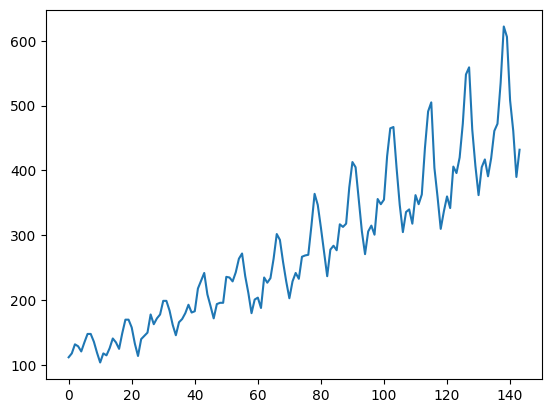

In [16]:
plt.plot(ap)
plt.show()

# ④ 분산을 일정하게 만들기 - log transformation

In [17]:
# np.log를 통해서 log transformation
ap_transformed = np.log(ap)

[]

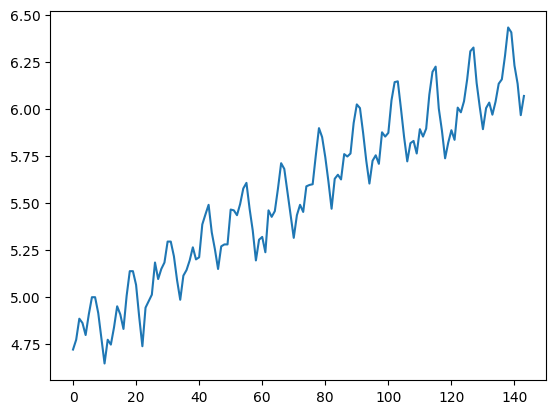

In [20]:
plt.plot(ap_transformed)
plt.plot()

[]

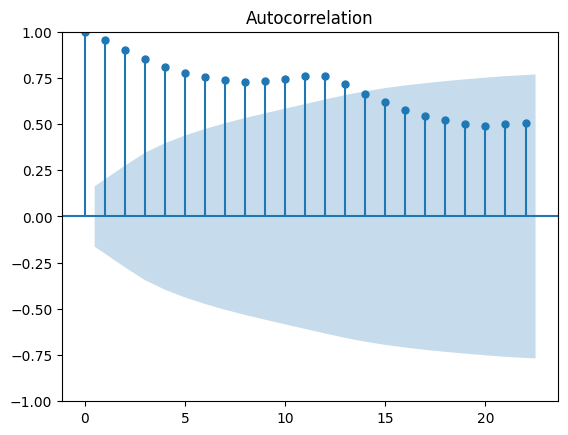

In [19]:
plot_acf(ap_transformed) # acf plot, 점차 감소하는 모양새를 지니고 있음
plt.plot()

[]

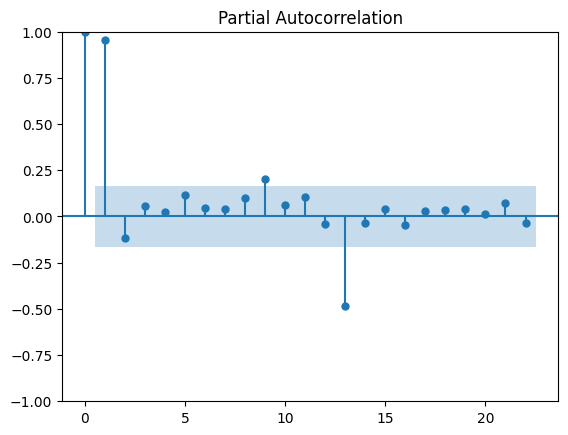

In [21]:
plot_pacf(ap_transformed) # pacf plot, lag 2까지 유의미한 결과를 보임
plt.plot()

# ⑤ 차분을 통해 분석하기
ACF, PACF Plot과 차분을 활용하여 분석합니다.

In [23]:
ap_diff = ap_transformed.diff()
ap_diff = ap_diff.dropna()

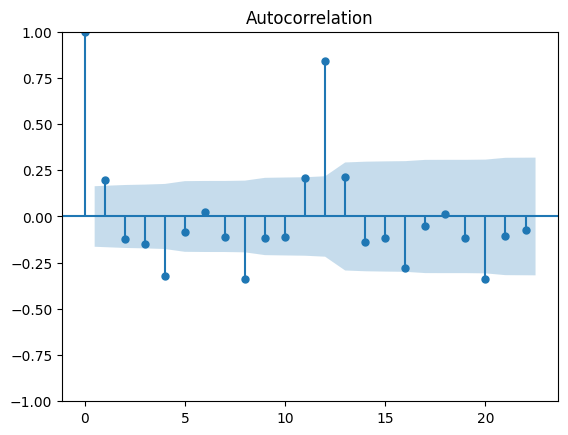

In [24]:
# lag 1과 lag 12에서 유의미한 lag가 포착됨
plot_acf(ap_diff)
plt.plot();

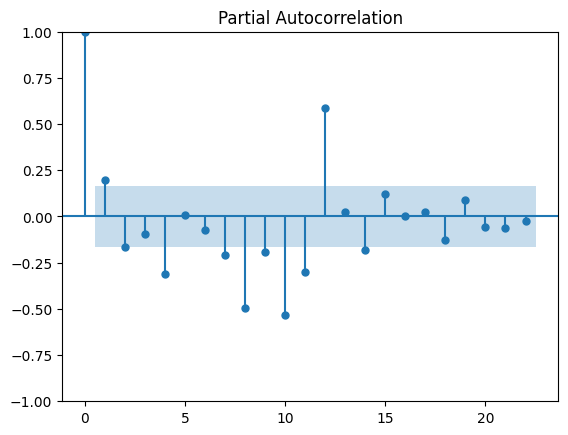

In [25]:
# lag 1, lag 8~12쯤에서 유의미한 lag가 포착됨
plot_pacf(ap_diff)
plt.plot();

In [26]:
ap_transformed

,#Passengers
0,4.718499
1,4.770685
2,4.882802
3,4.859812
4,4.795791
...,...
139,6.406880
140,6.230481
141,6.133398
142,5.966147


In [27]:
train_size = int(len(ap_transformed)*0.8)

ap_transformed_train = ap_transformed[:train_size]
ap_transformed_test = ap_transformed[train_size:]

In [28]:
ap_transformed_train

,#Passengers
0,4.718499
1,4.770685
2,4.882802
3,4.859812
4,4.795791
...,...
110,5.891644
111,5.852202
112,5.894403
113,6.075346


In [29]:
ap_transformed_test

,#Passengers
115,6.224558
116,6.001415
117,5.883322
118,5.736572
119,5.820083
120,5.886104
121,5.834811
122,6.006353
123,5.981414
124,6.040255


# ⑥ Auto ARIMA 적용 및 결과 확인

AutoARIMA의 파라미터:
* seasonal : False인 경우 non-seasonal model로 제한합니다.
* suppress_warnings : ARIMA를 실행하면 생기는 에러문구를 나오지 않도록 해줍니다.
* trace : True일 때 오류(error)가 발생하면 일부 내용을 출력합니다.
* max_D : seasonal의 최대 값을 설정할 수 있습니다.

In [30]:
# AutoARIMA
# seasonal = True, max_D(계절차분) = 12
model = pm.AutoARIMA(seasonal=True, suppress_warnings=True, trace=True, max_D=12)
res = model.fit(ap_transformed_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-213.916, Time=1.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-189.733, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-191.035, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-192.641, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-189.957, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.71 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-216.555, Time=0.47 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-214.724, Time=0.48 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-218.097, Time=0.59 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-200.633, Time=0.31 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-219.339, Time=0.67 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-198.633, Time=0.60 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=-214.474, Time=0.76 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=i

AIC가 안정적으로 가장 낮은 (infinite) 값으로 확인된 ARIMA(5,1,2)를 사용합니다.

AIC (Akaike Information Criterion): AIC 값은 모델의 성능을 평가하는 지표로, 값이 낮을수록 모델의 적합도가 높습니다. 절대적으로 좋은 값이 있기보다는 여러 모델을 비교할 때 사용합니다.

* AR 모델의 p=5
* I 차분값 d=1
* MA 모델의 q=2

일반적으로는 오버피팅을 우려할 수 있는 값이긴 합니다.

In [34]:
# confidence interval까지 도출
preds, conf_int = res.predict(n_periods=ap_transformed_test.shape[0], return_conf_int=True)
# n_periods: the number of future time periods to forecast

# 아래의 코드 결과값을 서로 비교 분석해봅시다.
print(preds.shape)
print(type(preds))
print('--'*40)
print(preds.shape[0])
print(type(preds.shape[0]))
print('--'*40)
print(preds)
print('--'*40)
print(conf_int)

(29,)
<class 'pandas.core.series.Series'>
--------------------------------------------------------------------------------
29
<class 'int'>
--------------------------------------------------------------------------------
115    6.202988
116    6.170074
117    6.119401
118    6.051822
119    6.019914
120    6.016473
121    6.042797
122    6.084070
123    6.129736
124    6.163914
125    6.185198
126    6.191376
127    6.189418
128    6.184415
129    6.183275
130    6.188062
131    6.199918
132    6.216198
133    6.234469
134    6.251537
135    6.266014
136    6.277226
137    6.286108
138    6.293796
139    6.301762
140    6.310814
141    6.321357
142    6.333089
143    6.345500
dtype: float64
--------------------------------------------------------------------------------
[[6.03833663 6.36763871]
 [5.94122176 6.39892679]
 [5.87655504 6.36224761]
 [5.80268547 6.30095904]
 [5.77043354 6.26939364]
 [5.76254989 6.27039606]
 [5.78307995 6.3025145 ]
 [5.82162229 6.34651871]
 [5.86684138 6.3926

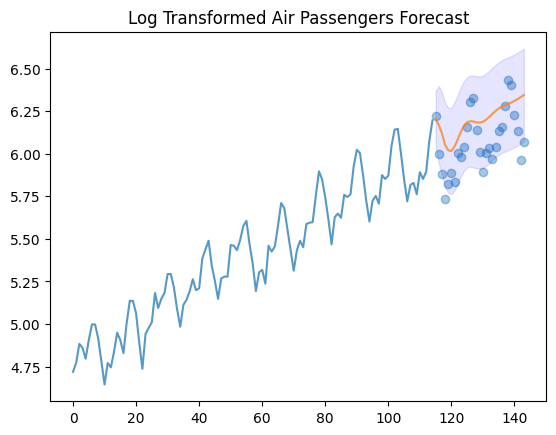

In [36]:
# 0. train과 test data를 축(axis)으로 만들었습니다.
x_axis = np.arange(ap_transformed_train.shape[0] + preds.shape[0]) # 115+29, plot을 그리기 위해 x축을 생성합니다.

# 1. x축은 test으로 만들어 놓은 train data를 사용하고, y축에 train data를 사용하여 train data를 시각화 합니다.
plt.plot(x_axis[:ap_transformed_train.shape[0]], ap_transformed_train, alpha=0.75)

# 2. 1번 그래프에서 정답(AutoARIMA를 통해 만든 예측 값)에 해당하는 일자형 그래프가 생성됩니다.
plt.plot(x_axis[ap_transformed_train.shape[0]:], preds, alpha=0.75)

# 3. 원래 가지고 있던 데이터셋의 y값(지도 학습의 정답)을 산점도(scatter plot)로 생성합니다.
plt.scatter(x_axis[ap_transformed_train.shape[0]:], ap_transformed_test,
            alpha=0.4, marker='o')

# 4. 2, 3번의 분포에 해당하는 구간을 채워 그래프로 나타냈습니다.
plt.fill_between(x_axis[-preds.shape[0]:], conf_int[:,0], conf_int[:,1],
                 alpha=0.1, color='b')

plt.title("Log Transformed Air Passengers Forecast")
plt.show() # 4개의 plot을 시각화합니다.


대부분의 test set의 y값이 95% 신뢰구간안에 분포하는 것을 확인할 수 있습니다.
AutoARIMA가 예측한 값은 점점 mean값을 향해 converge하는 것으로 보입니다.

# ⑦ ARCH 모델 실습해보기

## ⑦-1 : 데이터 및 라이브러리 불러오기

In [35]:
import datetime as dt
import arch.data.sp500

## ⑦-2 : 필요한 데이터로 가공하고 시각화를 통해 확인하기

In [46]:
st = dt.datetime(2002, 1, 1) # start date
en = dt.datetime(2022, 1, 1) # end date
data = arch.data.sp500.load() # s&P 500 데이터 불러오기
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-04,1229.229980,1248.810059,1219.099976,1228.099976,1228.099976,877000000
1999-01-05,1228.099976,1246.109985,1228.099976,1244.780029,1244.780029,775000000
1999-01-06,1244.780029,1272.500000,1244.780029,1272.339966,1272.339966,986900000
1999-01-07,1272.339966,1272.339966,1257.680054,1269.729980,1269.729980,863000000
1999-01-08,1269.729980,1278.239990,1261.819946,1275.089966,1275.089966,937800000


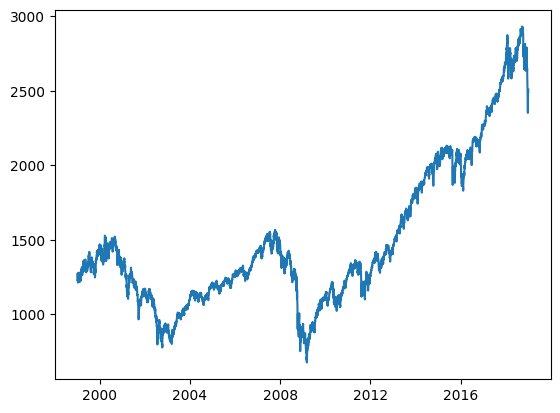

In [47]:
market = data["Adj Close"]
plt.plot(market)

In [48]:
returns = 100 * market.pct_change().dropna() # return 값으로 변환
returns.head()

Date
1999-01-05    1.358200
1999-01-06    2.214041
1999-01-07   -0.205133
1999-01-08    0.422136
1999-01-11   -0.879151
Name: Adj Close, dtype: float64

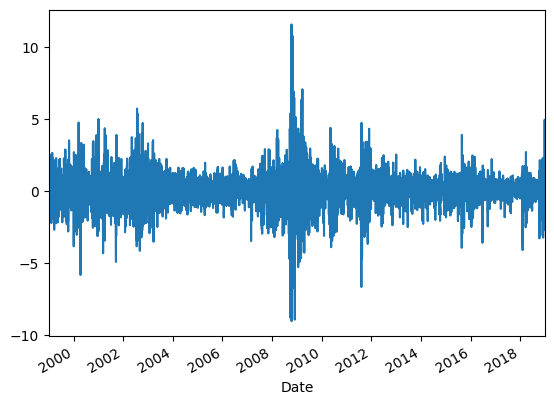

In [40]:
ax = returns.plot() # 수익률을 그래프로 만들기
xlim = ax.set_xlim(returns.index.min(), returns.index.max()) # xlim은 x축 값의 보기를 제한합니다.
plt.show()

## ⑦-3 : ARCH 모델 적용

In [49]:
from arch import arch_model

am = arch_model(returns) # returns을 arch모델에 적합
res = am.fit(update_freq=1)

Iteration:      1,   Func. Count:      6,   Neg. LLF: 278392203378920.22
Iteration:      2,   Func. Count:     15,   Neg. LLF: 2801628462.676755
Iteration:      3,   Func. Count:     22,   Neg. LLF: 10200.264821310848
Iteration:      4,   Func. Count:     29,   Neg. LLF: 7030.288339344431
Iteration:      5,   Func. Count:     35,   Neg. LLF: 6970.2765831170655
Iteration:      6,   Func. Count:     41,   Neg. LLF: 7051.517858694138
Iteration:      7,   Func. Count:     47,   Neg. LLF: 6938.100841509388
Iteration:      8,   Func. Count:     53,   Neg. LLF: 6936.741981139894
Iteration:      9,   Func. Count:     58,   Neg. LLF: 6936.718529877007
Iteration:     10,   Func. Count:     63,   Neg. LLF: 6936.718477482658
Iteration:     11,   Func. Count:     68,   Neg. LLF: 6936.718476988985
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6936.718476988985
            Iterations: 11
            Function evaluations: 68
            Gradient evaluations:

* Iteration: Each iteration represents a step in the optimization process where the algorithm updates the model parameters in an attempt to minimize the objective function (Neg. LLF).

* Func. Count: This indicates the cumulative number of times the objective function (Neg. LLF) has been evaluated during the optimization process. It includes both the evaluations during each iteration and any additional evaluations required to find gradients or Hessians (used in some optimization algorithms).

* Negative Log-Likelihood (Neg. LLF):
    - The Neg. LLF value is the negative of the log-likelihood function at the current parameter estimates. The goal of the optimization is to minimize this value, which corresponds to maximizing the likelihood function.
    - Initially, the Neg. LLF is extremely large (278,392,203,378,920.22), likely due to a poor starting point or initial parameter values. As the iterations progress, this value decreases significantly, indicating that the algorithm is finding better parameter estimates that fit the data more closely.
    - The final Neg. LLF value is 6936.718476988985, which suggests the best set of parameters found by the optimization process.

## ⑦-4 : 지표를 통한 결과 확인

* 다양한 결과가 제시되어있으나, 수업때 배웠던 p-value, AIC, BIC 위주로 내용을 파악
* 아래에 있는 volatility model을 보면 alpha[1], Beta[1]은 GARCH(1,1)을 의미하며, p-value를 통해 신뢰도 95%에서 이들이 유의미함을 도출

In [44]:
print(res.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6936.72
Distribution:                  Normal   AIC:                           13881.4
Method:            Maximum Likelihood   BIC:                           13907.5
                                        No. Observations:                 5030
Date:                Fri, Jul 26 2024   Df Residuals:                     5029
Time:                        07:16:22   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0564  1.149e-02      4.906  9.302e-07 [3.

1. Model Overview
- Mean Model: Constant mean, which assumes a constant expected return over time.
- Volatility Model: GARCH(1,1)
<br/><br/>
2. Model Fit Statistics
- Log-Likelihood: -6936.72
    - a measure of the goodness-of-fit. Higher (less negative) values indicate a better fit.
- AIC (Akaike Information Criterion): 13881.4
    - a measure of the model's quality that balances fit and complexity. Lower values indicate a better model.
- BIC (Bayesian Information Criterion): 13907.5
    - similar to AIC but penalizes model complexity more strictly.
<br/><br/>
3. Parameter Estimates
- Mean Model (mu):
    -Coefficient: 0.0564
    -Standard Error: 0.01149
    - t-Statistic: 4.906
    - p-Value: 9.302e-07
    - 95% Confidence Interval: [0.03384, 0.07887]
    - The estimated mean return (mu) is 0.0564%. The t-statistic and p-value indicate this coefficient is statistically significant, meaning the mean return is significantly different from zero.

- Volatility Model Parameters:
    - omega: The constant term in the volatility equation.
        - Coefficient: 0.0175
        - Standard Error: 0.004683
        - t-Statistic: 3.738
        - p-Value: 1.854e-04 - statistically significant
        - 95% Confidence Interval: [0.008328, 0.02669]
    - alpha[1]: The coefficient for the lagged squared returns (ARCH term), or how much the past squared returns impact current volatility.
        - Coefficient: 0.1022
        - Standard Error: 0.01301
        - t-Statistic: 7.852
        - p-Value: 4.105e-15 - statistically significant
        - 95% Confidence Interval: [0.07665, 0.128]
    - beta[1]: The coefficient for the lagged volatility (GARCH term), or the persistence of volatility (a high value close to 1 suggests that volatility shocks have a long-lasting effect)
        - Coefficient: 0.8852
        - Standard Error: 0.01380
        - t-Statistic: 64.125
        - p-Value: 0.000 - statistically significant
        - 95% Confidence Interval: [0.858, 0.912]
<br/><br/>
Conclusion:
- The model indicates that past volatility has a significant and persistent effect on future volatility, a common characteristic of financial markets.
- The coefficients are statistically significant, meaning the model parameters are reliable estimates of the true effects.
- The GARCH model appears to fit the data well, as indicated by the log-likelihood, AIC, and BIC values, suggesting it effectively captures the volatility dynamics in the S&P 500 returns data over the period analyzed.

## ⑦-5 : 시각화를 통한 결과값 확인

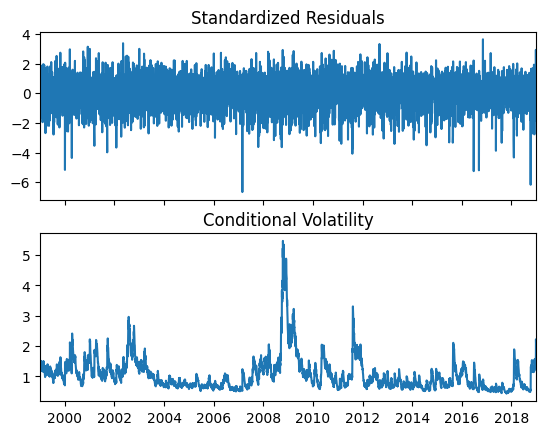

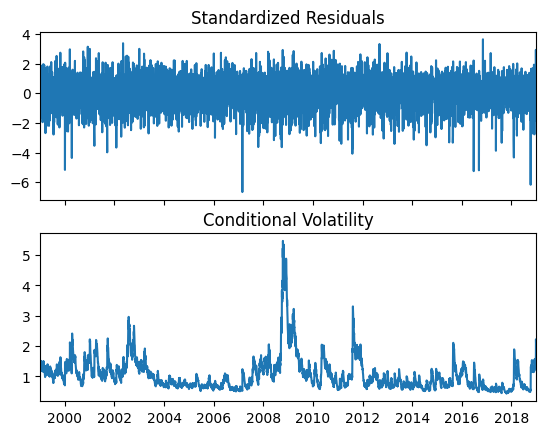

In [45]:
res.plot()

* First Plot: Standardized Residuals (Time Series Plot)
    - This plot shows the standardized residuals over time. Standardized residuals are the residuals divided by the conditional standard deviation (volatility), which helps in identifying patterns or anomalies in the residuals that might indicate model inadequacies.
    - It helps to check if the residuals are approximately homoscedastic (i.e., constant variance) and if they display any obvious time-varying patterns that the model hasn't captured.

* Second Plot: Conditional Volatility (Time Series Plot)
    - This plot displays the estimated conditional volatility (i.e., the model's estimate of the standard deviation of the residuals) over time.
    - It shows how volatility evolves according to the fitted model, which is crucial in understanding how well the model captures periods of high and low volatility.

* Third Plot: Standardized Residuals (ACF or PACF Plot)
    - This plot typically shows the autocorrelation function (ACF) or partial autocorrelation function (PACF) of the standardized residuals.
    - The purpose is to check if there is any remaining autocorrelation in the residuals after fitting the model. In a well-fitted model, the standardized residuals should resemble white noise, implying no significant autocorrelation.

* Fourth Plot: Conditional Volatility (ACF or PACF Plot)
    - Similar to the third plot but for the squared standardized residuals or the squared conditional volatilities.
    - It checks for any remaining autocorrelation in the squared residuals, which can indicate that the model might not have fully captured the volatility clustering (a common feature in financial time series).

## ⑦-6 : volatility를 rolling forecast의 방식으로 예측해본다면?

In [52]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model (train, p=1, q=1)
    model_fit = model.fit(disp ='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [53]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-test_size:])

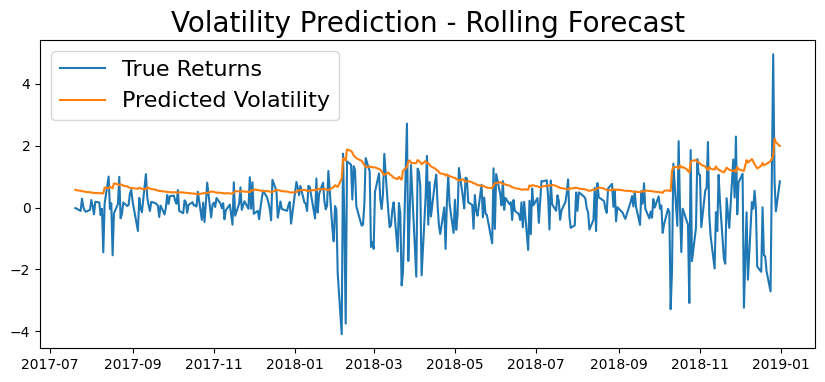

In [55]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)